In [1]:
import matplotlib.pyplot as plt
import numpy as np
import idx2numpy
from tqdm import tqdm

In [2]:
test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')
train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
print(test_images.shape)
print(test_labels.shape)
print(train_images.shape)
print(train_labels.shape)

(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)


In [4]:
train_images_flat=train_images.reshape(train_images.shape[0], -1).T
test_images_flat=test_images.reshape(test_images.shape[0], -1).T

In [5]:
print(train_images_flat.shape)
print(test_images_flat.shape)
m = train_images_flat.shape[1]
m_test = test_images_flat.shape[1]
print(f"Train Examples={m}")
print(f"Test Examples={m_test}")
X = train_images_flat/255
X_test = test_images_flat/255

(784, 60000)
(784, 10000)
Train Examples=60000
Test Examples=10000


In [8]:
# Y = train_labels.reshape(train_labels.shape[0],1).T # Y.shape is (1, m)
# Y.shape

(1, 60000)

In [6]:
def one_hot(row_vector, no_classes):
    one_hot_vector = np.eye(no_classes)[row_vector.reshape(-1)]
    return one_hot_vector.T

In [152]:
C = train_labels.max()+1
print(f"No. of Classes={C}")
Y_hot = one_hot(train_labels,no_classes=C)
Y_test_hot = one_hot(test_labels,no_classes=C)
print(Y_hot.shape) #Y_hot.shape is (C,m)
print(Y_test_hot.shape) #Y_hot.shape is (C,m)

No. of Classes=10
(10, 60000)
(10, 10000)


In [64]:
def initialize():
    global W,b
    W = np.random.randn(train_images_flat.shape[0], C)*0.001 # W.shape is (n_x,1)
    b = np.zeros((1,m)) #b.shape is (1,m)
initialize()

In [65]:
print(W.shape)
print(b.shape)

(784, 10)
(1, 60000)


In [66]:
def softmax(z):
    t = np.exp(z)
    a = t / np.sum(t)
    return a

In [67]:
def forward():
    global Z,A
    Z = np.dot(W.T, X) + b # Z.shape is (C,m)
    A = softmax(Z)  # A.shape is (C,m)

In [68]:
def cost():
    global L,J
# Calculate Loss
    L = -np.sum(Y_hot*np.log(A), keepdims=True, axis=0) # L.shape is (1,m)   '''NO BROADCASTING GOING ON HERE'''
    #calculate Cost
    J = np.sum(L, keepdims=True, axis=1)*(1/m) # J.shape is (1,1) 

In [69]:
# deivatives
def backward():
    global dZ, dW, db
    #dJ/dZ
    dZ = A-Y_hot  # dZ.shape is (C,m)   '''BROADCASTING GOING ON HERE'''

    #dJ/dW = sum(dL/dW)/m  which is equivalent to np.dot(X,dZ.T)/m
    '''
    dLdW = X*dZ  # dLdW.shape is (n_x, m)
    dW = np.sum(dLdW, keepdims=True, axis=1)/m  #dW.shape is (n_x,1) [same as W.shape]
    '''
    dW = np.dot(X, dZ.T) / m
    #dJ/db
    db = np.sum(dZ, keepdims=True, axis=1)/m  # db.shape = (1,1)

In [189]:
forward()
cost()
backward()
A.shape, Y_hot.shape, L.shape, J.shape,Z.shape, dZ.shape, W.shape, dW.shape, db.shape

((10, 60000),
 (10, 60000),
 (1, 60000),
 (1, 1),
 (10, 60000),
 (10, 60000),
 (784, 10),
 (784, 10),
 (10, 1))

In [194]:
initialize()

In [196]:
#optimise
alpha = 0.001
iterations = 2000
global costs
costs=[]
for i in range(iterations):
    forward()
    if i%4 ==0:
        cost()
        costs.append(J)
        print(f'Cost at {i}th loop = {J}')
    backward()
    W = W - alpha*dW
    b = b - alpha*db

Cost at 0th loop = [[13.28388876]]
Cost at 4th loop = [[13.2796916]]
Cost at 8th loop = [[13.27552016]]
Cost at 12th loop = [[13.27137453]]
Cost at 16th loop = [[13.26725481]]
Cost at 20th loop = [[13.26316109]]
Cost at 24th loop = [[13.25909349]]
Cost at 28th loop = [[13.25505209]]
Cost at 32th loop = [[13.251037]]
Cost at 36th loop = [[13.24704832]]
Cost at 40th loop = [[13.24308616]]
Cost at 44th loop = [[13.23915061]]
Cost at 48th loop = [[13.23524178]]
Cost at 52th loop = [[13.23135978]]
Cost at 56th loop = [[13.22750471]]
Cost at 60th loop = [[13.22367667]]
Cost at 64th loop = [[13.21987578]]
Cost at 68th loop = [[13.21610214]]
Cost at 72th loop = [[13.21235587]]
Cost at 76th loop = [[13.20863706]]
Cost at 80th loop = [[13.20494584]]
Cost at 84th loop = [[13.20128231]]
Cost at 88th loop = [[13.19764658]]
Cost at 92th loop = [[13.19403877]]
Cost at 96th loop = [[13.190459]]
Cost at 100th loop = [[13.18690737]]
Cost at 104th loop = [[13.183384]]
Cost at 108th loop = [[13.17988902]]

Cost at 896th loop = [[13.28425865]]
Cost at 900th loop = [[13.29056674]]
Cost at 904th loop = [[13.29695516]]
Cost at 908th loop = [[13.30342423]]
Cost at 912th loop = [[13.30997426]]
Cost at 916th loop = [[13.31660555]]
Cost at 920th loop = [[13.32331842]]
Cost at 924th loop = [[13.33011318]]
Cost at 928th loop = [[13.33699011]]
Cost at 932th loop = [[13.34394951]]
Cost at 936th loop = [[13.35099168]]
Cost at 940th loop = [[13.35811689]]
Cost at 944th loop = [[13.36532544]]
Cost at 948th loop = [[13.3726176]]
Cost at 952th loop = [[13.37999364]]
Cost at 956th loop = [[13.38745383]]
Cost at 960th loop = [[13.39499844]]
Cost at 964th loop = [[13.40262772]]
Cost at 968th loop = [[13.41034192]]
Cost at 972th loop = [[13.4181413]]
Cost at 976th loop = [[13.42602609]]
Cost at 980th loop = [[13.43399654]]
Cost at 984th loop = [[13.44205287]]
Cost at 988th loop = [[13.45019531]]
Cost at 992th loop = [[13.45842409]]
Cost at 996th loop = [[13.46673941]]
Cost at 1000th loop = [[13.47514149]]
Co

Cost at 1764th loop = [[16.54906199]]
Cost at 1768th loop = [[16.5709398]]
Cost at 1772th loop = [[16.59285458]]
Cost at 1776th loop = [[16.61480604]]
Cost at 1780th loop = [[16.63679389]]
Cost at 1784th loop = [[16.65881784]]
Cost at 1788th loop = [[16.6808776]]
Cost at 1792th loop = [[16.70297289]]
Cost at 1796th loop = [[16.72510343]]
Cost at 1800th loop = [[16.74726894]]
Cost at 1804th loop = [[16.76946914]]
Cost at 1808th loop = [[16.79170375]]
Cost at 1812th loop = [[16.81397252]]
Cost at 1816th loop = [[16.83627516]]
Cost at 1820th loop = [[16.85861141]]
Cost at 1824th loop = [[16.88098101]]
Cost at 1828th loop = [[16.9033837]]
Cost at 1832th loop = [[16.92581921]]
Cost at 1836th loop = [[16.94828728]]
Cost at 1840th loop = [[16.97078767]]
Cost at 1844th loop = [[16.99332012]]
Cost at 1848th loop = [[17.01588438]]
Cost at 1852th loop = [[17.0384802]]
Cost at 1856th loop = [[17.06110734]]
Cost at 1860th loop = [[17.08376554]]
Cost at 1864th loop = [[17.10645458]]
Cost at 1868th l

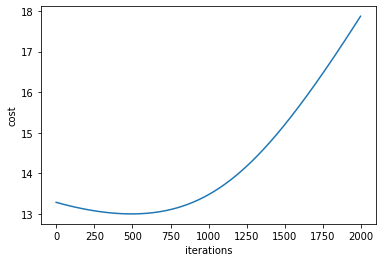

500

In [199]:
plt.plot(np.arange(0,2000,4), np.array(costs).reshape(len(costs),1))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()
len(costs)


In [200]:
# A[:,0].max() == A[:,0]
O = (np.max(A,axis=0) == A).T * np.array([0,1,2,3,4,5,6,7,8,9]).T

In [201]:
F = np.sum(O,axis=1)
F,train_labels

(array([3, 0, 4, ..., 8, 0, 8]), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [202]:
print(f'{np.sum(F==train_labels)} images correctly labeled out of {train_labels.shape[0]} for Train Set')

40390 images correctly labeled out of 60000 for Train Set


In [203]:
print(f'Accuracy : {100 - np.mean(np.abs(A- Y_hot))*100} on Train Set')

Accuracy : 90.0001457656297 on Train Set


In [204]:
print(f'Cost for training was {J}')

Cost for training was [[17.87103595]]


In [205]:
# test
Z_test = np.dot(W.T, X_test) + b[:,:10000]
A_test = softmax(Z_test)
L_test = -np.sum(Y_test_hot*np.log(A_test), keepdims=True, axis=0)
J_test = np.sum(L_test, keepdims=True, axis=1)*(1/m)

In [206]:
O_test = (np.max(A_test,axis=0) == A_test).T * np.array([0,1,2,3,4,5,6,7,8,9]).T
F_test = np.sum(O_test,axis=1)
F_test, test_labels

(array([7, 3, 1, ..., 8, 8, 6]), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [207]:
print(f'{np.sum(F_test==test_labels)} images correctly labeled out of {test_labels.shape[0]} for Test Set')

6814 images correctly labeled out of 10000 for Test Set


In [208]:
print(f'Accuracy : {100 - np.mean(np.abs(A_test- Y_test_hot))*100} on Test Set')

Accuracy : 90.00084644323799 on Test Set


In [209]:
print(f'Cost for training was {J_test}')

Cost for training was [[2.7277507]]


The image no. is 2 and my Model predicts 3


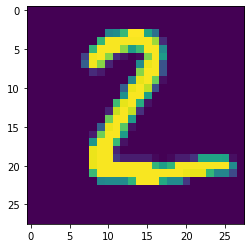

In [211]:
image = 1 #5247
plt.imshow(test_images[image])
print(f'The image no. is {test_labels[image]} and my Model predicts {F_test[image]}')

In [165]:
b[:,:10000].shape

(10, 10000)